# Preparation

In [20]:
from Bio import Entrez
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


Entrez.email = "myrzakunbekovis@gmail.com"

pd.set_option('display.max_colwidth', None)

In [21]:
df_500 = pd.read_csv("./pubmed_health_articles_500.csv")
df_1500_1 = pd.read_csv("./pubmed_health_articles_first_1500.csv")
df_1500_2 = pd.read_csv("./pubmed_health_articles_second_1500.csv")
df_10000 = pd.read_csv("./pubmed_health_articles_10000.csv")

# Analysis

## BERTopic analysis

### Running BERTopic

In [25]:
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer

The hyperparameters below were selected because of:
1. 'allenai-specter' - a sentence transformer trained on scientific papers and abstracts
2. the parameters for CountVectorizer:
- stop_words -> we remove common English words
- ngram_range -> captures both singular words and bigrams, e.g. "gut microbiota"
- max_df -> excludes terms that appear in more than given percentage of documents
- min_df -> excludes very rare words seen in less than the given amount of documents
- max_features -> limits vocabulary size to the given amount
3. the parameters for BERTopic model:
- embedding_model -> ...
- vectorizer_model -> determines which words are used to describe topics
- nr_topics = "auto" -> automatically reduces similar topics
- top_n_words = 10 -> shows 10 most representative words per topic
- calculate_probabilities = true -> can separate each document to topics be probability ("this document is 60% topic1 and 40% topic2")
4. docs is needed for extracting text from dataframe and filling empty cells with ""

In [33]:
# Using scientific transformer
model = SentenceTransformer("allenai-specter")

# Custom preprocessing with vectorizer
vectorizer_model = CountVectorizer(
    stop_words="english",  
    ngram_range=(1, 2),    
    max_df=0.85,           
    min_df=2,              
    max_features=3000  
)

# Creating BERTopic model
topic_model = BERTopic(
    embedding_model=model,
    vectorizer_model=vectorizer_model,
    nr_topics="auto",
    top_n_words=10,       
    calculate_probabilities=True
)

In [34]:
# Training on data
docs = df_1500_2['abstract'].fillna("").tolist()
topics, probs = topic_model.fit_transform(docs)

# Get topic info
topic_info = topic_model.get_topic_info()
topic_info.to_csv('./TopicModelling_1500_2.csv', index=False)

### Reviewing results

In [35]:
topic_info_500 = pd.read_csv('./TopicModelling_500.csv')
topic_info_1500_1 = pd.read_csv('./TopicModelling_1500_1.csv')
topic_info_1500_2 = pd.read_csv('./TopicModelling_1500_2.csv')
topic_info_10000 = pd.read_csv('./TopicModelling_10000.csv')

In [36]:
topic_info_500

Unnamed: 0  Topic  Count                                Name  \
0           0      0    381          0_aging_health_healthy_age   
1           1      1     65  1_cognitive_age_memory_performance   
2           2      2     54                               2____   

                                                                                              Representation  \
0  ['aging', 'health', 'healthy', 'age', 'longevity', 'life', 'ageing', 'healthy aging', 'older', 'related']   
1   ['cognitive', 'age', 'memory', 'performance', 'brain', 'adults', 'older', 'healthy', 'related', 'aging']   
2                                                                   ['', '', '', '', '', '', '', '', '', '']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [32]:
topic_info_1500_1

Topic  Count                                        Name  \
0     -1      8          -1_sleep_duration_sleep quality_al   
1      0   1149                  0_aging_health_healthy_age   
2      1    165               1_cognitive_age_adults_memory   
3      2    134                                       2____   
4      3     44  3_gut_microbiota_gut microbiota_microbiome   

                                                                                                               Representation  \
0                              ['sleep', 'duration', 'sleep quality', 'al', 'quality', 'sa', 'sub', 'high', 'visit', 'aging']   
1                           ['aging', 'health', 'healthy', 'age', 'ageing', 'longevity', 'life', 'older', 'study', 'related']   
2             ['cognitive', 'age', 'adults', 'memory', 'older', 'brain', 'performance', 'healthy', 'older adults', 'related']   
3                                                                                    ['', '', '', '', '', '', '', '', '', '']   
4  ['gut', 'microbiota', 'gut microbiota', 'microbiome', 'aging', 'gut microbiome', 'healthy', 'age', 'related', 'microbial']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [38]:
topic_info_10000

Topic  Count                            Name  \
0     -1   3151     -1_age_health_healthy_older   
1      0   5671      0_age_health_healthy_older   
2      1    985   1_project_organ_decades_drugs   
3      2     97      2_cows_traits_herd_genetic   
4      3     40  3_tree_trees_species_mortality   
5      4     19  4_pharyngeal_healthy_adults_pd   
6      5     19  5_seed_storage_seeds_viability   
7      6     17     6_dose_radiation_mice_gamma   

                                                                                                         Representation  \
0            ['age', 'health', 'healthy', 'older', 'adults', 'ageing', 'cognitive', 'stress', 'older adults', 'social']   
1                      ['age', 'health', 'healthy', 'older', 'adults', 'ageing', 'sup', 'cognitive', 'long', 'factors']   
2                                             ['project', 'organ', 'decades', 'drugs', 'compounds', '', '', '', '', '']   
3                     ['cows', 'traits', 'herd', 'genetic', 'dairy', 'calving', 'culling', 'cow', 'milk', 'production']   
4                        ['tree', 'trees', 'species', 'mortality', 'growth', 'forest', 'leaf', 'plant', 'root', 'fine']   
5          ['pharyngeal', 'healthy', 'adults', 'pd', 'pressure', 'healthy adults', 'values', 'method', 'age', 'safety']   
6  ['seed', 'storage', 'seeds', 'viability', 'pollen', 'temperature', 'species', 'conservation', 'ageing', 'genotypes']   
7                 ['dose', 'radiation', 'mice', 'gamma', 'irradiation', 'cancer', 'exposure', 'day', 'exposed', 'days']   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

### Relation between topics

Try Jaccard overlap or other similarity coefficients

## TF-IDF Analysis

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter

The parameters for TF-IDF were selected because of:
    <br>TfIdfVectorizer:
- ngram_range = (1,3) -> needed for capturing single words and phrases of 2,3 words
- max_df = 0.85 -> ignore words appearing in more than 85 % of documents
- min_df = 2 -> ignore words appearing in 2 or less documents

In [60]:
def get_top_terms(df):
    abstracts = df['abstract'].dropna().tolist()
    
    # Configuring tf-idf
    tfidf = TfidfVectorizer(
        ngram_range=(1, 3),      
        max_df=0.85,            
        min_df=2,               
        stop_words='english'
    )
    
    # Fitting TF-IDF and getting scores
    tfidf_matrix = tfidf.fit_transform(abstracts)
    feature_names = tfidf.get_feature_names_out()
    
    # Getting top 50 terms by mean TF-IDF score
    top_indices = np.argsort(tfidf_matrix.mean(axis=0).A1)[-50:]
    top_terms = feature_names[top_indices]
    
    print("Top 50 most important terms/phrases:")
    print(top_terms)

    return tfidf_matrix, feature_names

In [61]:
m1,f1 = get_top_terms(df_500)
m2,f2 = get_top_terms(df_1500_1)
m3,f3 = get_top_terms(df_1500_2)
m4,f4 = get_top_terms(df_10000)

Top 50 most important terms/phrases:
['group' 'activity' 'changes' 'performance' 'process' 'participants'
 'dietary' 'memory' 'brain' 'gut' 'decline' 'individuals' 'function'
 'mechanisms' 'based' 'effects' 'review' 'healthy ageing'
 'successful aging' 'people' 'population' 'human' 'physical' 'disease'
 'interventions' 'years' 'studies' 'older adults' 'age related' 'diseases'
 'factors' 'sup' 'successful' 'lifespan' 'research' 'study' 'associated'
 'adults' 'social' 'related' 'healthy aging' 'cognitive' 'longevity'
 'life' 'older' 'healthy' 'age' 'ageing' 'health' 'aging']
Top 50 most important terms/phrases:
['risk' 'including' 'successful aging' 'functional' 'using' 'biological'
 'potential' 'individuals' 'based' 'healthy ageing' 'process' 'changes'
 'function' 'model' 'sup' 'people' 'data' 'successful' 'review' 'anti'
 'population' 'mechanisms' 'physical' 'human' 'effects' 'disease' 'years'
 'interventions' 'factors' 'studies' 'age related' 'research' 'diseases'
 'older adults' 'soc

In [62]:
def plot_mean_tfidf(tfidf_matrix, feature_names):
    # Get mean TF‑IDF score for each feature
    mean_tfidf = tfidf_matrix.mean(axis=0).A1
    top_idx = mean_tfidf.argsort()[-30:]            
    terms  = feature_names[top_idx]
    scores = mean_tfidf[top_idx]
    
    plt.figure(figsize=(10, 8))
    plt.barh(terms, scores)
    plt.title("Top TF‑IDF Terms in Healthy‑Aging Abstracts")
    plt.xlabel("Mean TF‑IDF score")
    plt.tight_layout()
    plt.show()

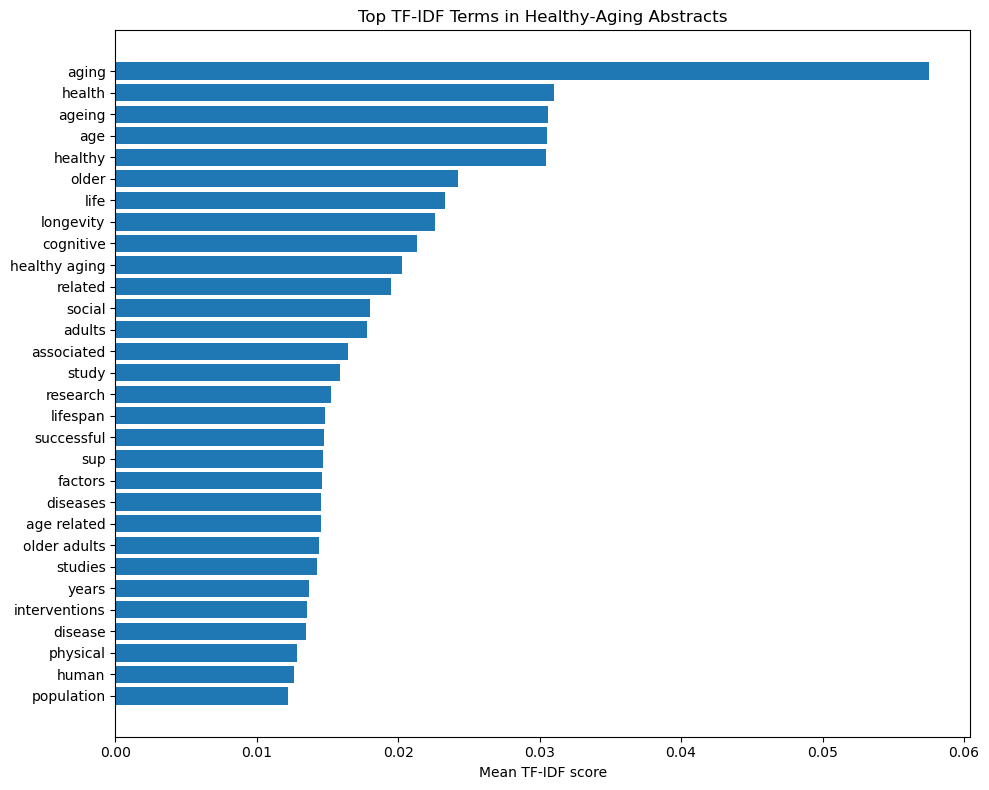

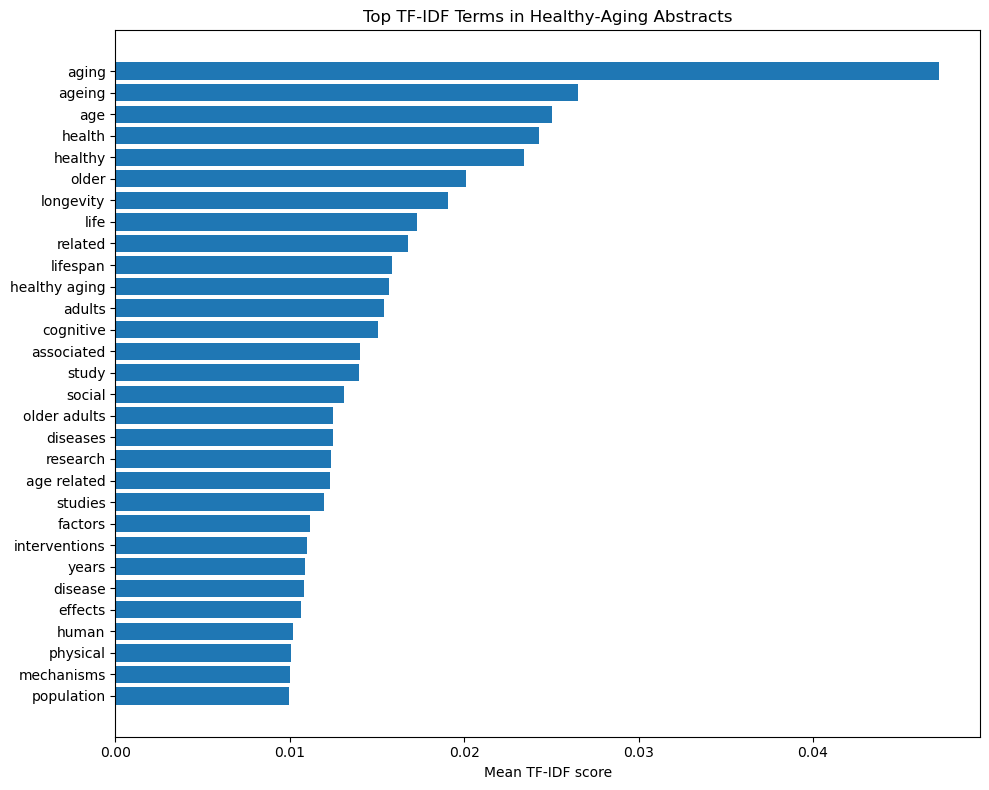

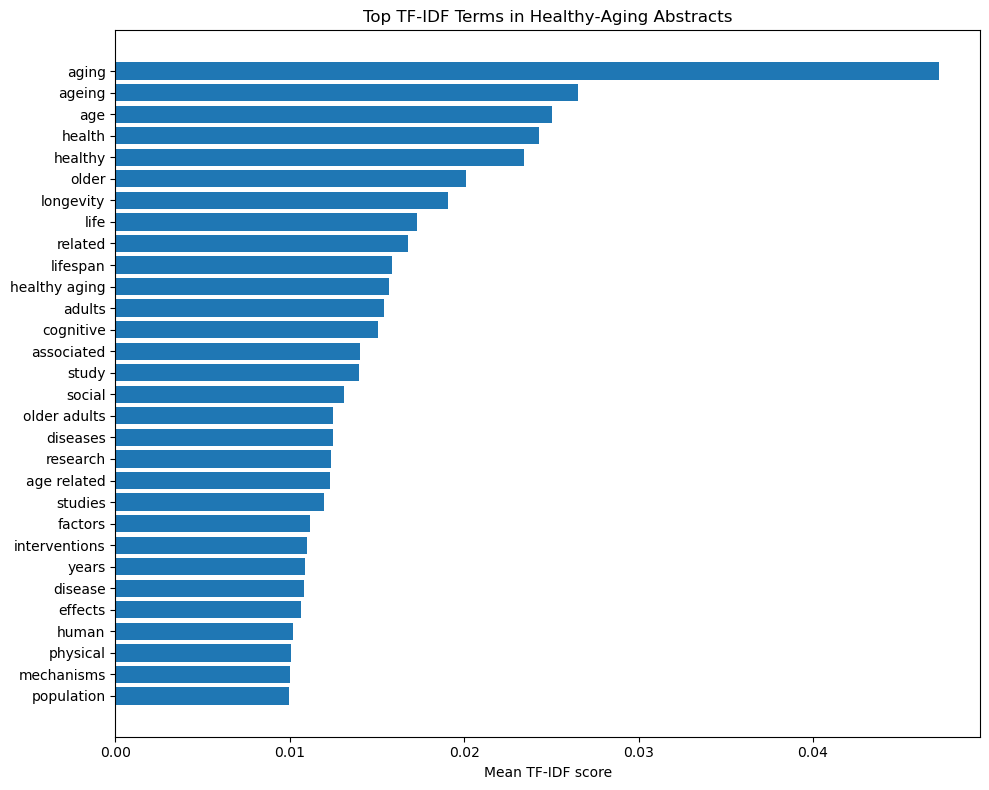

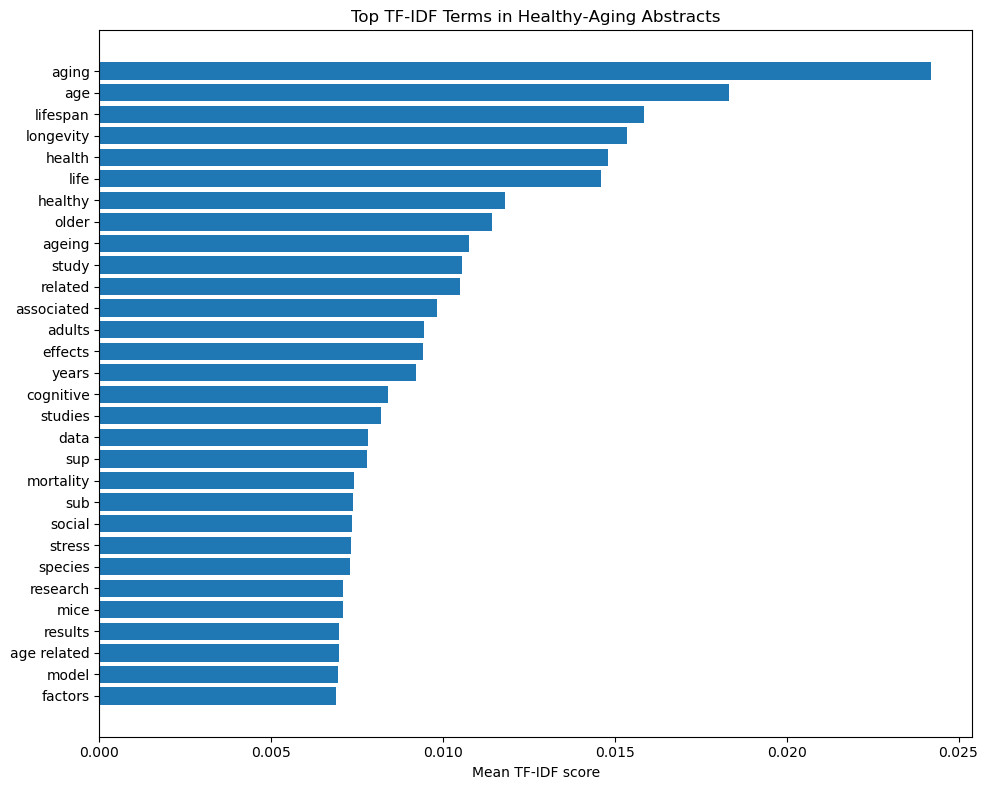

In [63]:
plot_mean_tfidf(m1, f1)
plot_mean_tfidf(m2, f2)
plot_mean_tfidf(m3, f3)
plot_mean_tfidf(m4, f4)

## Yearly distribution

In [59]:
display(df)

,pmid,title,abstract,journal,year,pub_date,mesh_terms,source,topic,period
0,33377391,Gut microbiota and aging.,"Aging is characterized by the functional decline of tissues and organs and increased risk of aging-associated disorders, which pose major societal challenges and are a public health priority. Despite extensive human genetics studies, limited progress has been made linking genetics with aging. There is a growing realization that the altered assembly, structure and dynamics of the gut microbiota actively participate in the aging process. Age-related microbial dysbiosis is involved in reshaping immune responses during aging, which manifest as immunosenescence (insufficiency) and inflammaging (over-reaction) that accompany many age-associated enteric and extraenteric diseases. The gut microbiota can be regulated, suggesting a potential target for aging interventions. This review summarizes recent findings on the physiological succession of gut microbiota across the life-cycle, the roles and mechanisms of gut microbiota in healthy aging, alterations of gut microbiota and aging-associated diseases, and the gut microbiota-targeted anti-aging strategies.",Critical reviews in food science and nutrition,2022.0,{'Year': '2022'},Aging; Dysbiosis; Gastrointestinal Microbiome; Healthy Aging; Humans; Immunosenescence,PubMed,health,10-year data
1,37867396,Diet strategies for promoting healthy aging and longevity: An epidemiological perspective.,"In recent decades, global life expectancies have risen significantly, accompanied by a marked increase in chronic diseases and population aging. This narrative review aims to summarize recent findings on the dietary factors influencing chronic diseases and longevity, primarily from large cohort studies. First, maintaining a healthy weight throughout life is pivotal for healthy aging and longevity, mirroring the benefits of lifelong, moderate calorie restriction in today's obesogenic food environment. Second, the specific types or food sources of dietary fat, protein, and carbohydrates are more important in influencing chronic disease risk and mortality than their quantity. Third, some traditional diets (e.g., the Mediterranean, Nordic, and Okinawa) and contemporary dietary patterns, such as healthy plant-based diet index, the DASH (dietary approaches to stop hypertension) diet, and alternate healthy eating index, have been associated with lower mortality and healthy longevity. These patterns share many common components (e.g., a predominance of nutrient-rich plant foods; limited red and processed meats; culinary herbs and spices prevalent in global cuisines) while embracing distinct elements from different cultures. Fourth, combining a healthy diet with other lifestyle factors could extend disease-free life expectancies by 8-10 years. While adhering to core principles of healthy diets, it is crucial to adapt dietary recommendations to individual preferences and cultures as well as nutritional needs of aging populations. Public health strategies should aim to create a healthier food environment where nutritious options are readily accessible, especially in public institutions and care facilities for the elderly. Although further mechanistic studies and human trials are needed to better understand molecular effects of diet on aging, there is a pressing need to establish and maintain long-term cohorts studying diet and aging in culturally diverse populations.",Journal of internal medicine,2024.0,"{'Year': '2024', 'Month': 'Apr'}",Humans; Aged; Longevity; Healthy Aging; Diet; Aging; Chronic Disease,PubMed,health,10-year data
2,33010900,Lifestyle (Medicine) and Healthy Aging.,"Healthy aging is a process that occurs over the life cycle. Health habits established early and practiced throughout life impact longevity, the ability to reach old age, and the health with which one experiences older adulthood. The new field of lifestyle medicine addresses root causes of disease by targeting nutrition, phy

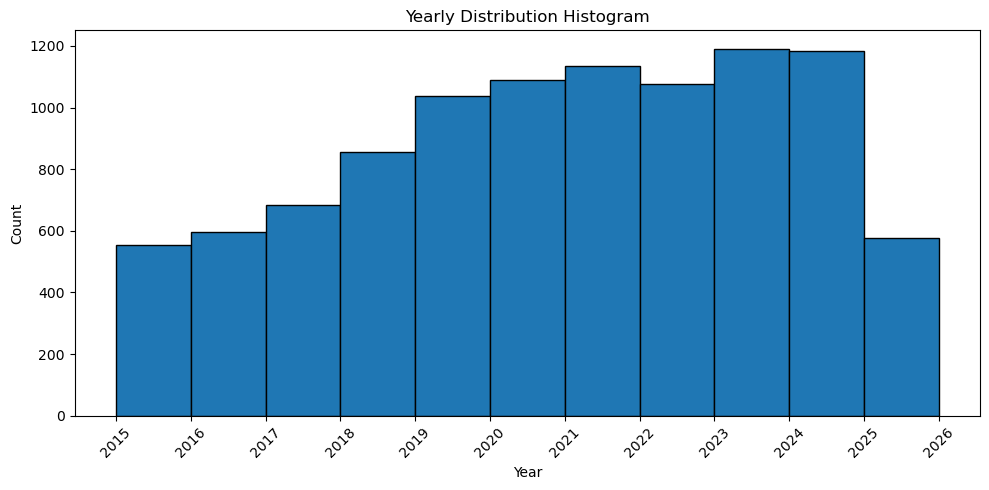

In [64]:
def yearly_distribution_hist(df):
    plt.figure(figsize=(10, 5))
    plt.hist(df['year'], bins=np.arange(2015, 2027), edgecolor='black')
    
    years = np.arange(2015, 2027)
    plt.xticks(years, rotation=45)
    
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('Yearly Distribution Histogram')
    plt.tight_layout()
    plt.show()

yearly_distribution_hist(df_10000)

In [65]:
prev = set(df_1500_1['pmid'].astype(str))   # known/old PMIDs
curr = set(df_1500_2['pmid'].astype(str))    # current run

new_pmids = curr - prev               # true set difference
print(f"New PMIDs: {len(new_pmids)}") # count

New PMIDs: 0
